max|Re Vx| = 2.99089987306 ; max|Re Vy| = 2.99089987306 ; max|Re Vz| = 0.0
max|Im Vx| = 2.99527949704 ; max|Im Vy| = 2.99527949704 ; max|Im Vz| = 0.0
4.45418584887 1.49384429425 -9.21034037198
max|Re Vx| = 0.0 ; max|Re Vy| = 0.0 ; max|Re Vz| = 2.9372598313
max|Im Vx| = 0.0 ; max|Im Vy| = 0.0 ; max|Im Vz| = 2.9372598313
0.0 -inf -9.21034037198
max|Re Vx| = 0.196810978395 ; max|Re Vy| = 0.196810978395 ; max|Re Vz| = 0.0
max|Im Vx| = 2.92635160589 ; max|Im Vy| = 2.92635160589 ; max|Im Vz| = 0.0
3.35927450311 1.21172502897 -9.21034037198
max|Re Vx| = 0.0 ; max|Re Vy| = 0.0 ; max|Re Vz| = 2.95438186033
max|Im Vx| = 0.0 ; max|Im Vy| = 0.0 ; max|Im Vz| = 2.95438186033
0.0 -inf -9.21034037198
max|Re Vx| = 2.98657866337 ; max|Re Vy| = 2.98657866337 ; max|Re Vz| = 0.0
max|Im Vx| = 2.94149451175 ; max|Im Vy| = 2.94149451175 ; max|Im Vz| = 0.0
4.79842996408 1.56828877359 -9.21034037198


/u/46/necadam1/unix/.local/lib/python3.4/site-packages/ipykernel/__main__.py:87: RuntimeWarning: divide by zero encountered in log
/u/46/necadam1/unix/.local/lib/python3.4/site-packages/ipykernel/__main__.py:89: RuntimeWarning: invalid value encountered in true_divide
/u/46/necadam1/unix/.local/lib/python3.4/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in true_divide


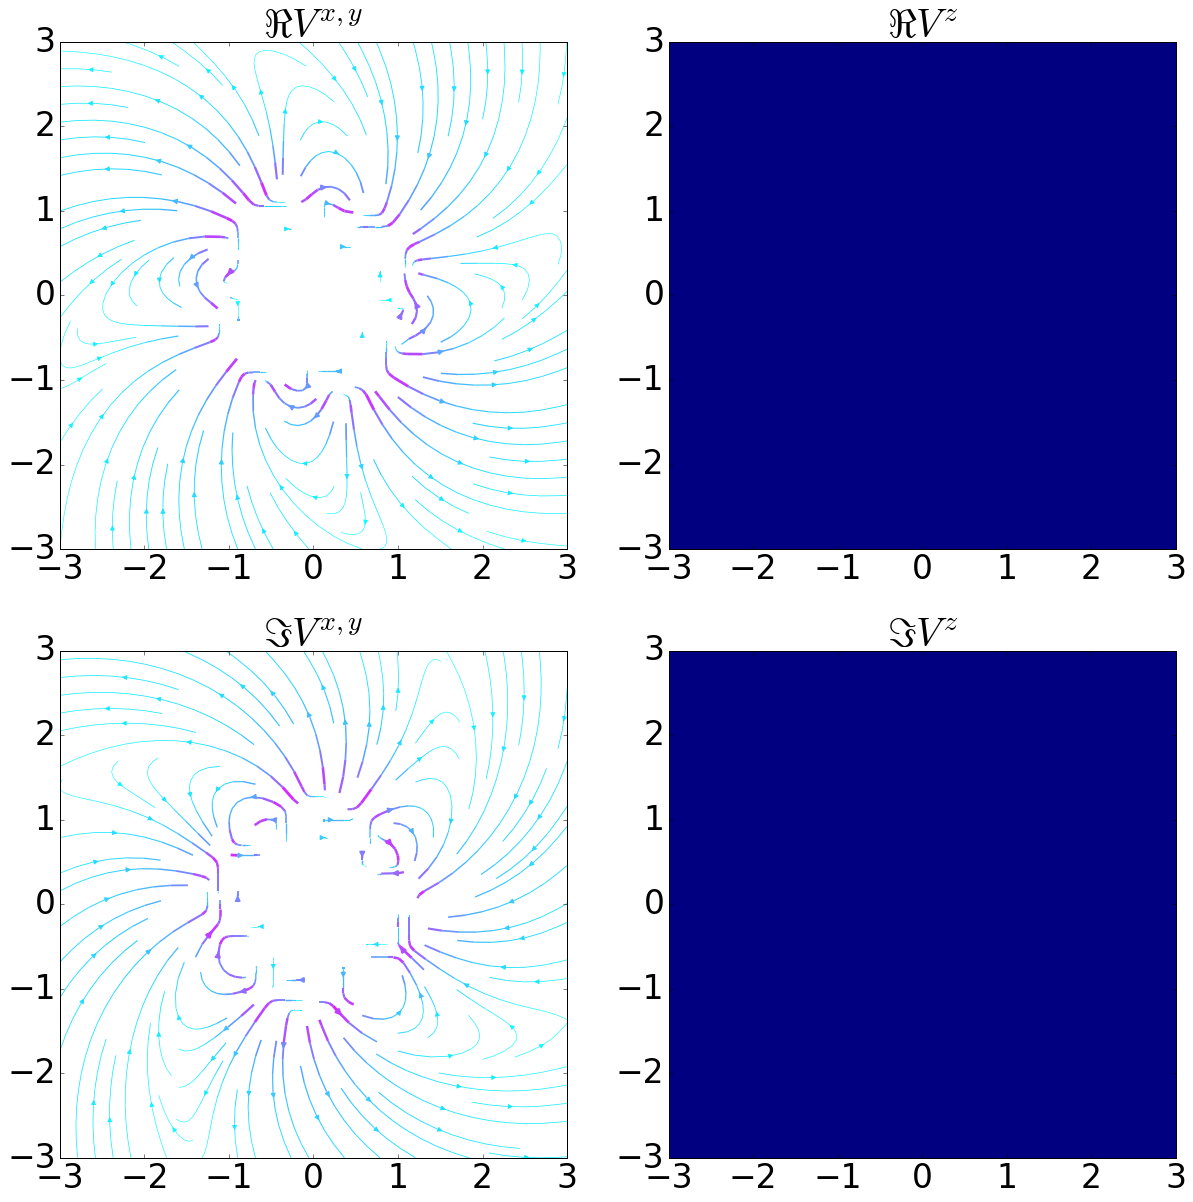

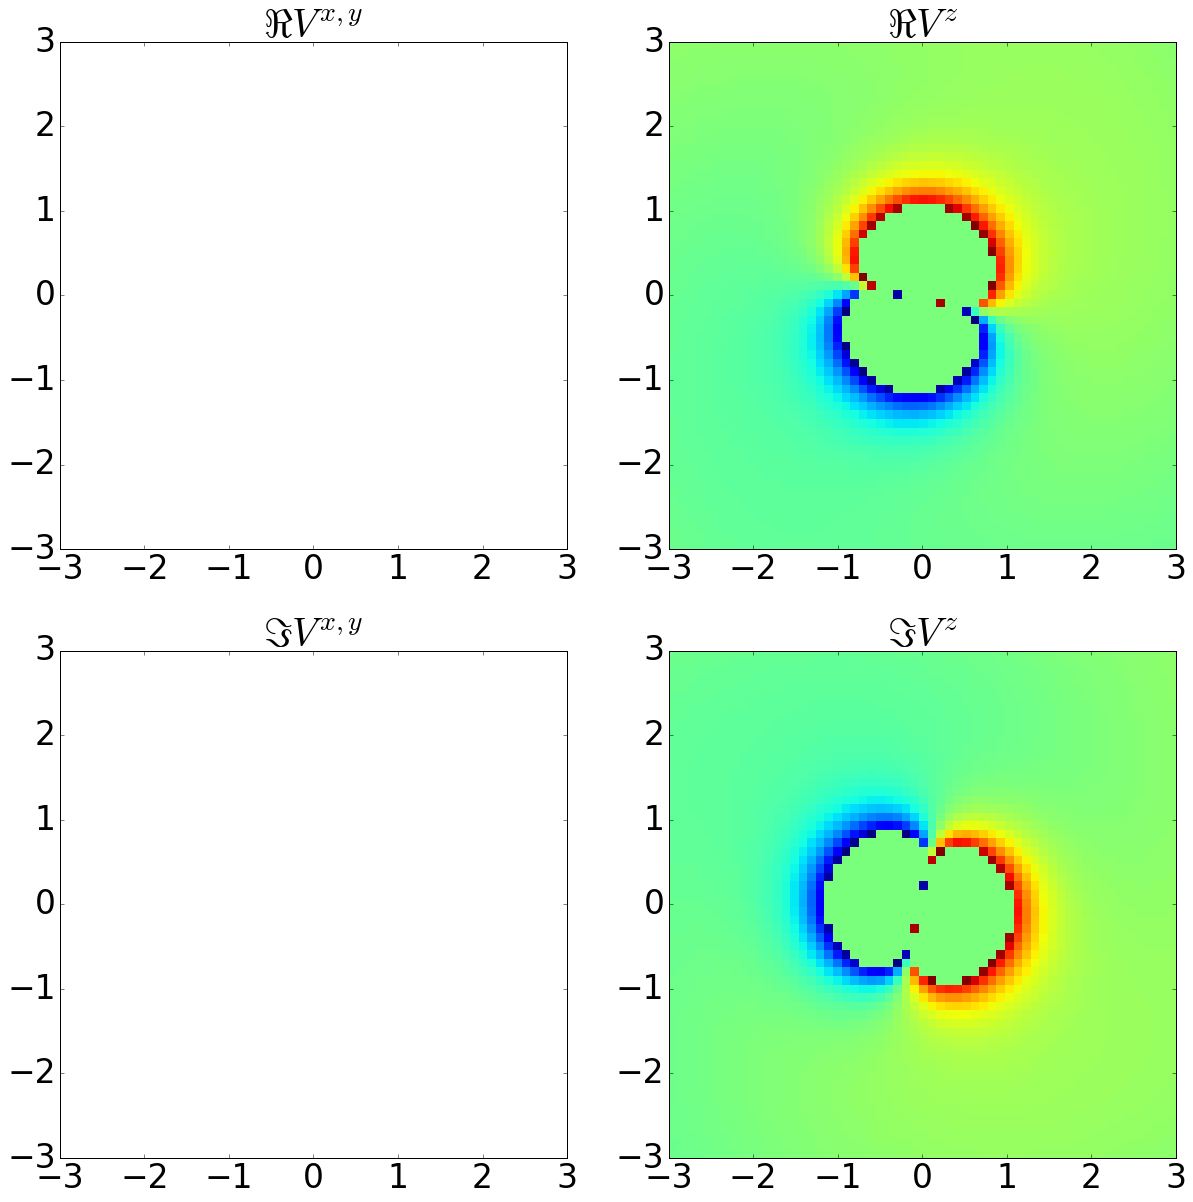

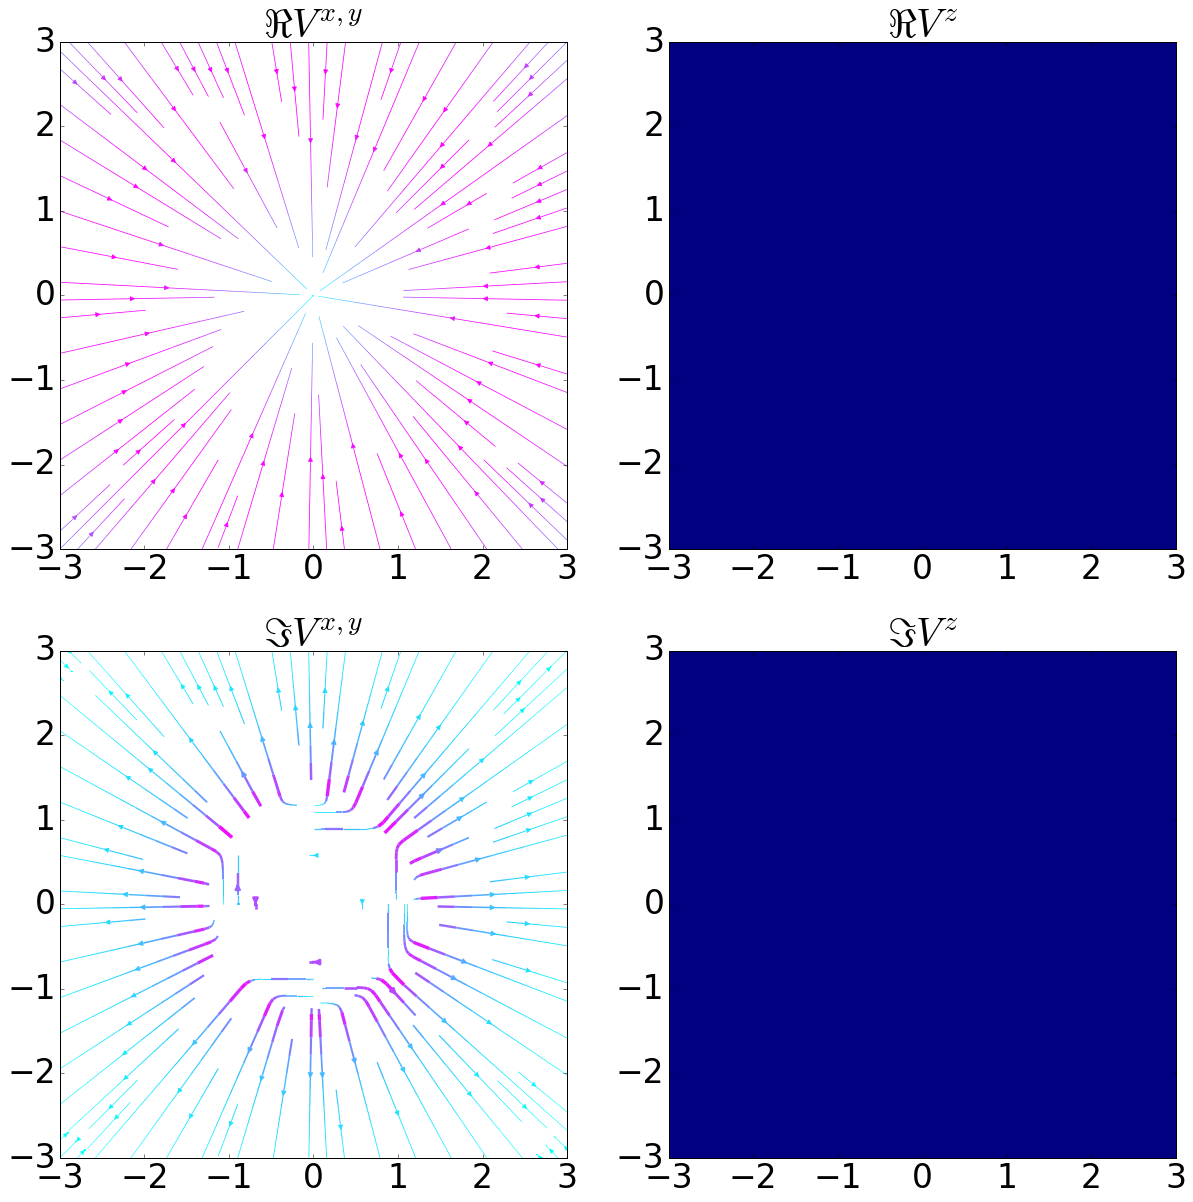

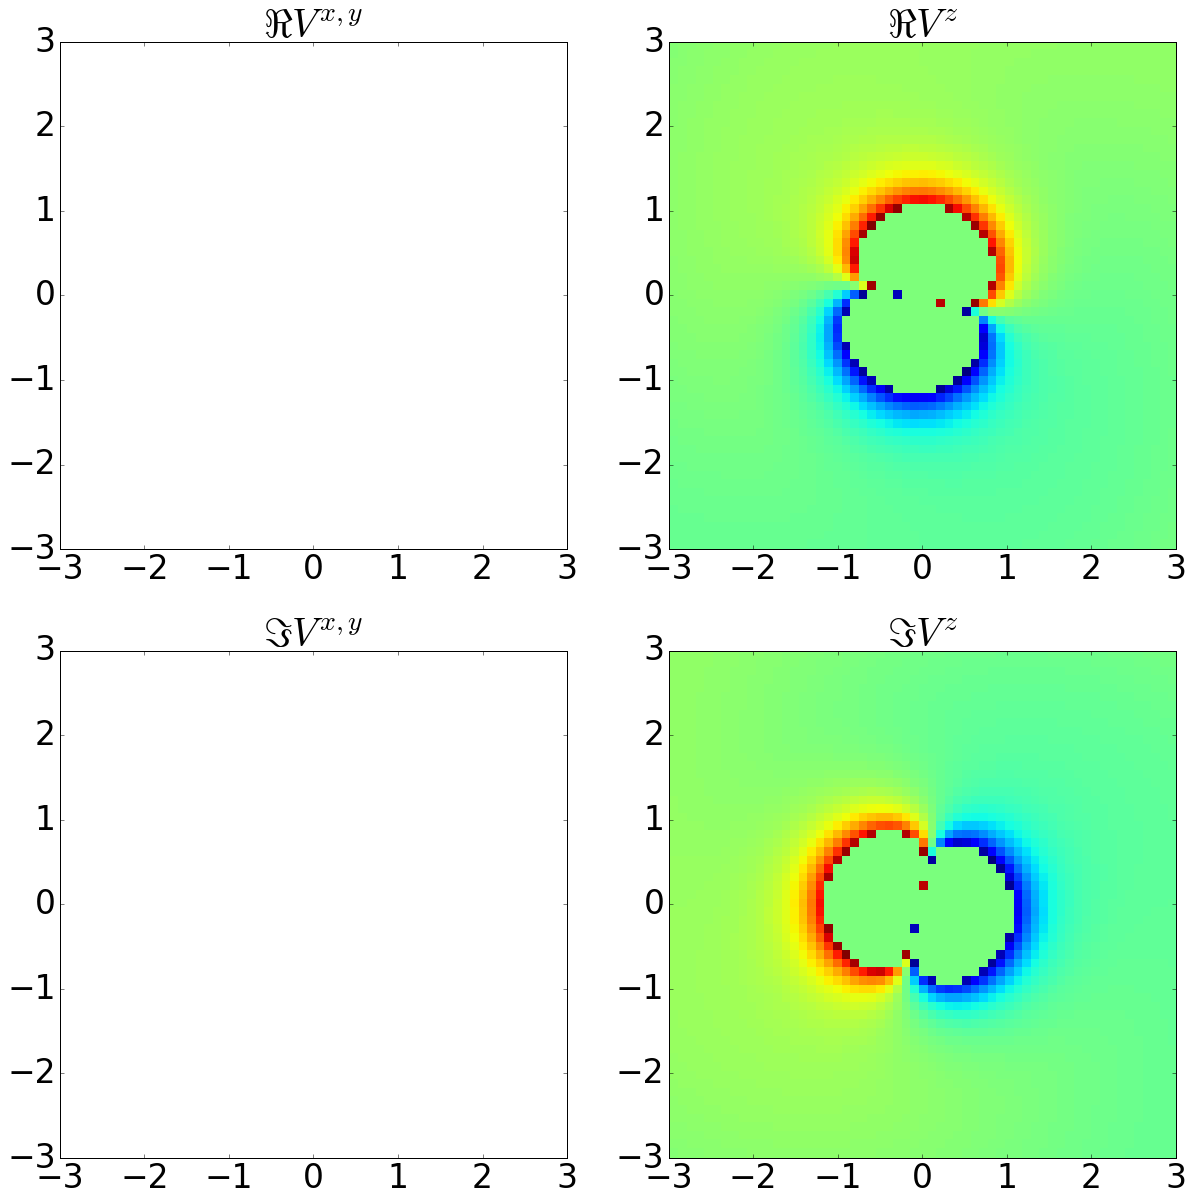

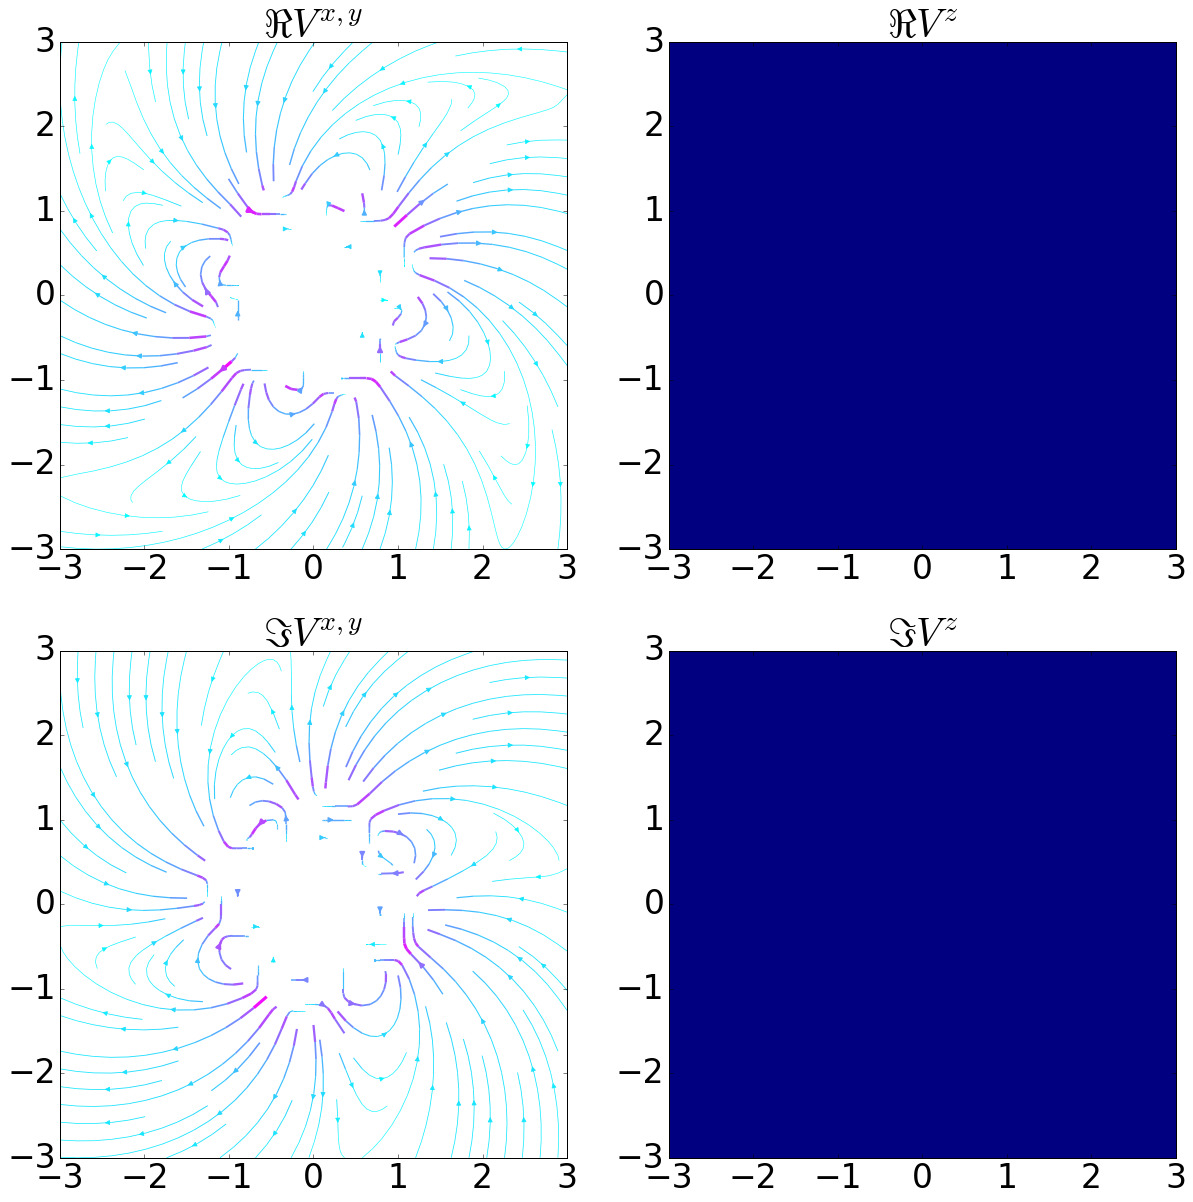

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
from qpms import *

l = 2
nmax = 2
J = 3

rotvec = (0.0,0.0,0.2)

h2 = 3
w2 = 3
x = np.linspace(-w2,w2,60)
hor_axis = 0
if (False): #xz plane
    z = np.linspace(-h2,h2,60)
    x, z = np.meshgrid(x,z)
    y = 0.0*np.ones(x.shape)#x*math.tan(-1.)*0.0
    perp_axis = 1
    ver_axis = 2
else: # xy plane
    y = np.linspace(-h2,h2,60)
    x, y = np.meshgrid(x,y)
    z = 0.0*np.ones(x.shape)#x*math.tan(-1.)*0.0
    perp_axis = 2
    ver_axis = 1
    


letrs = ('x','y','z')
hl = letrs[hor_axis]
pl = letrs[perp_axis]
vl = letrs[ver_axis]

# Souřadnice a původní vlna
my, ny = get_mn_y(nmax)
nelem = len(my)

cartgrid = np.stack((x,y,z),axis=-1)
sphgrid = cart2sph(cartgrid)
M_sph_ry = np.zeros(x.shape+(nelem,3),dtype=np.complex_)
N_sph_ry = np.zeros(x.shape+(nelem,3),dtype=np.complex_)

for ri in  np.ndindex(x.shape):
    M, N = vswf_yr1(sphgrid[ri],nmax,J=J)#vswf_yr1(np.array([sphgrid[ri+(0,)],sphgrid[ri+(1,)],sphgrid[ri+(2,)]]),nmax,J=J)
    M_sph_ry[ri] = M
    N_sph_ry[ri] = N
M_cart_ry = sph_loccart2cart(M_sph_ry, sphgrid[...,np.newaxis,:], axis=-1)
N_cart_ry = sph_loccart2cart(N_sph_ry, sphgrid[...,np.newaxis,:], axis=-1) 

M_sph_rot_ry = np.zeros(x.shape+(nelem,3),dtype=np.complex_)
N_sph_rot_ry = np.zeros(x.shape+(nelem,3),dtype=np.complex_)
for nn in range(1,nmax+1):
    D = WignerD_mm_fromvector(nn, rotvec)
    M_sph_rot_ry[...,ny==nn,:] = np.moveaxis(np.tensordot(D,M_sph_ry[...,ny==nn,:], axes=(-1,-2)), 0,-2)
    N_sph_rot_ry[...,ny==nn,:] = np.moveaxis(np.tensordot(D,N_sph_ry[...,ny==nn,:], axes=(-1,-2)), 0,-2)
M_cart_rot_ry = sph_loccart2cart(M_sph_rot_ry, sphgrid[...,np.newaxis,:], axis=-1)
N_cart_rot_ry = sph_loccart2cart(N_sph_rot_ry, sphgrid[...,np.newaxis,:], axis=-1) 
    

from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

#page = 2
plthr = 1e-4
plthr_hi = 3

#pages = (1,)
pages = np.arange(nelem)[ny==l]
for page in pages:
    #plotfield = N_cart_ry[...,1,:]
    plotfield = N_cart_rot_ry[...,page,:]
    #plotfield = N_cart_rot_ry[...,1,:] #-  N_cart_rot_ry[...,2,:]
    plotfield[np.abs(plotfield.real)<plthr]=1j*plotfield[np.abs(plotfield.real)<plthr].imag
    plotfield[np.abs(plotfield.imag)<plthr]=plotfield[np.abs(plotfield.imag)<plthr].real
    plotfield[np.abs(plotfield.real)>plthr_hi]=1j*plotfield[np.abs(plotfield.real)>plthr_hi].imag
    plotfield[np.abs(plotfield.imag)>plthr_hi]=plotfield[np.abs(plotfield.imag)>plthr_hi].real
    f, axarr = plt.subplots(2, 2, figsize=(20,20))
    print("max|Re Vx| =",np.max(np.abs(plotfield[...,0].real)),
          "; max|Re Vy| =",np.max(np.abs(plotfield[...,1].real)),
          "; max|Re Vz| =",np.max(np.abs(plotfield[...,2].real)))
    print("max|Im Vx| =",np.max(np.abs(plotfield[...,0].imag)),
          "; max|Im Vy| =",np.max(np.abs(plotfield[...,1].imag)),
          "; max|Im Vz| =",np.max(np.abs(plotfield[...,2].imag)))
    fieldmax = np.max(np.linalg.norm(plotfield[...,(hor_axis,ver_axis)], axis=-1))
    print(fieldmax, np.log(fieldmax), np.log(plthr))
    #axarr[0,0].quiver(cartgrid[...,hor_axis], cartgrid[...,ver_axis],  plotfield[...,hor_axis].real, plotfield[...,ver_axis].real,pivot='middle') #<--------
    strengthl = np.log(np.linalg.norm(plotfield[...,(hor_axis,ver_axis)].real, axis=-1)/fieldmax + 1.11) # +plthr to avoid log(0)
    if(np.max(np.abs(plotfield[...,(ver_axis,hor_axis)].real)) > plthr):
        axarr[0,0].streamplot(cartgrid[...,hor_axis], cartgrid[...,ver_axis], plotfield[...,hor_axis].real, plotfield[...,ver_axis].real, color = strengthl, linewidth = 5*strengthl, cmap=plt.cm.cool,  )
    axarr[0,0].set_title('$\Re V^{'+hl+','+vl+'}$')
    axarr[0,0].set_xlim(-w2,w2)
    axarr[0,0].set_ylim(-h2,h2)
    axarr[0,1].scatter(cartgrid[...,hor_axis], cartgrid[...,ver_axis],s=220,
                       edgecolors='none',
                       c=plotfield[...,perp_axis].real,marker='s')
    axarr[0,1].set_xlim(-w2,w2)
    axarr[0,1].set_ylim(-h2,h2)
    axarr[0,1].set_title("$\Re V^"+pl+"$")
    #axarr[1,0].quiver(cartgrid[...,hor_axis], cartgrid[...,ver_axis], plotfield[...,hor_axis].imag, plotfield[...,ver_axis].imag,pivot='middle')
    strengthl = np.log(np.linalg.norm(plotfield[...,(hor_axis,ver_axis)].imag, axis=-1)/fieldmax + 1.11) # +plthr to avoid log(0)
    if(np.max(np.abs(plotfield[...,(ver_axis,hor_axis)].imag)) > plthr):
        axarr[1,0].streamplot(cartgrid[...,hor_axis], cartgrid[...,ver_axis], plotfield[...,hor_axis].imag, plotfield[...,ver_axis].imag, color=strengthl,  linewidth =  5*strengthl, cmap=plt.cm.cool,  )
    axarr[1,0].set_title('$\Im V^{' + hl + ',' +vl + '}$')
    axarr[1,0].set_xlim(-w2,w2)
    axarr[1,0].set_ylim(-h2,h2)
    axarr[1,1].scatter(cartgrid[...,hor_axis], cartgrid[...,ver_axis],s=220,
                       edgecolors='none',
                       c=plotfield[...,perp_axis].imag,marker='s')
    axarr[1,1].set_xlim(-w2,w2)
    axarr[1,1].set_ylim(-h2,h2)
    axarr[1,1].set_title("$\Im V^"+pl+"$")
    #f.suptitle("$M_{"+str(my[page])+"}^{"+str(ny[page])+"(1)}$ (yz plane)",fontsize='x-large')
    matplotlib.rcParams.update({'font.size': 33})

    pp.savefig()
pp.close()
